In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
sns.set()
pd.options.display.max_columns = 170

In [64]:
df = pd.read_csv('~/Desktop/DFG_CHF/HOUSING_SUPPORT_IMPACT.csv')

In [65]:
#df.info()

In [66]:
df.shape

(81924, 75)

In [67]:
# significant null distribution
perc = ( df.isnull().sum() / len(df) ) *100
perc_null = perc [perc >10]
#perc_null

In [68]:
vars = df.columns.tolist()
for var in vars:
    df[var].replace('NO VALUE', np.nan, inplace=True)
    df[var].replace(-999999, np.nan, inplace=True)

In [69]:
# re-run for removing significant nulls
# with 82K data, will place threshold for nulls at 25%
perc = ( df.isnull().sum() / len(df) ) *100
perc_null = perc [perc >25]
#perc_null

In [70]:
# variables with 25% data as null -> remove
#perc_null.index
## date nulls NOT yet replaced

**df1 = with null values removed**

In [71]:
df1 = df.copy()
df1.drop(perc_null.index.drop('GRADUATION_TYPE'), axis =1, inplace =True)
# keep grad type for possible target, null values 26%

**df2 = insignificant/less significant columns removed**

In [72]:
df2 = df1.copy()

In [73]:
insig = ['PK_HOUSING',
        'AGENCY_ID',
        'PROGRAM_ID',
        'PROGRAM_FIRST_RECORD_FLAG',
        'PROGRAM_LAST_RECORD_FLAG',
        'ASSESSMENT_TYPE',
        # 'HOUSED_KPI_INDICATOR',
         #'REHOUSED_3MONTHS_KPI_INDICATOR'
        ]
df2.drop(insig, axis=1, inplace=True)

In [141]:
#df2.isnull().sum()

**df 3 = Fill missing values**

In [75]:
df3 = df2.copy()

In [76]:
#df3['GENDER'].value_counts()
#--> generalize to mode, transgender

In [77]:
#df3['ASSESSMENT_DESCRIPTOR'].value_counts()
# -> replace null with mode

In [78]:
#df3['DAYS_ENTRY_TO_MOVE_IN_COUNT'].value_counts()
# -> replace with median

In [79]:
#df3['DAYS_MOVE_IN_TO_EXIT_COUNT'].value_counts()
#  --> replace null with mean

In [80]:
#df3['ESTIMATED_HOUSING_STATUS'].value_counts()
# --> replace null with 'status unknown'

In [81]:
df3['GRADUATION_TYPE'].value_counts()
# previously assumed that NO VALUE meant not YET graduated
#  now see that there is a value for not graduated
# -> replace not grad with null

graduated        43025
not graduated    17437
Name: GRADUATION_TYPE, dtype: int64

In [82]:
df3['GRADUATION_TYPE'].replace('not grad', 'not recorded', inplace=True)
df3['GRADUATION_TYPE'].isnull().sum()

21462

In [83]:
df3['GRADUATION_TYPE'].value_counts()

graduated        43025
not graduated    17437
Name: GRADUATION_TYPE, dtype: int64

In [84]:
df3['GRADUATION_TYPE'].isnull().sum()
# --> replace null with not recorded

21462

In [85]:
df3['DAYS_MOVE_IN_TO_EXIT_COUNT'].mean()

961.0558234779124

In [86]:
# replacing null values
df3['GENDER'].fillna('Male',inplace=True)
df3['DAYS_ENTRY_TO_MOVE_IN_COUNT'].fillna(df3['DAYS_ENTRY_TO_MOVE_IN_COUNT'].median(),inplace=True)
df3['DAYS_MOVE_IN_TO_EXIT_COUNT'].fillna(df3['DAYS_MOVE_IN_TO_EXIT_COUNT'].mean(),inplace=True)
df3['ESTIMATED_HOUSING_STATUS'].fillna('status unknown',inplace=True)
df3['GRADUATION_TYPE'].fillna('not recorded',inplace=True)
df3['ASSESSMENT_DESCRIPTOR'].fillna('Housing First',inplace=True)

df3.isnull().sum()

CLIENT_ID                      0
CLIENTUID_CHF                  0
AGE_CURRENT                    0
GENDER                         0
HOUSEHOLD_STATUS               0
CLIENT_EVENT_ORDER             0
PROGRAM_EVENT_ORDER            0
AGENCY_NAME                    0
PROGRAM_NAME                   0
PROGRAM_ACTIVE_FLAG            0
PROGRAM_FUNDED_FLAG            0
PROGRAM_TYPE                   0
HOUSING_TYPE                   0
ASSESSMENT_DATE                0
ASSESSMENT_DATE_DMY            0
ASSESSMENT_DATE_MDY            0
ASSESSMENT_DESCRIPTOR          0
ENTRY_DATE                     0
ENTRY_DATE_DMY                 0
ENTRY_DATE_MDY                 0
AGE_AT_ENTRY                   0
MOVEIN_DATE                    0
MOVEIN_DATE_DMY                0
MOVEIN_DATE_MDY                0
DAYS_ENTRY_TO_MOVE_IN_COUNT    0
DAYS_MOVE_IN_TO_EXIT_COUNT     0
DAYS_ENTRY_TO_EXIT_COUNT       0
CLIENT_STATUS                  0
ESTIMATED_HOUSING_STATUS       0
EXIT_DATE                      0
EXIT_DATE_

**Looking into variables**

In [87]:
df3['CLIENT_ID'].nunique()

13324

In [88]:
df3['CLIENTUID_CHF'].nunique()

12641

In [89]:
len(df3)
# data contains multiple entries for clients

81924

In [140]:
#df3[ df3['CLIENT_ID'] == 21452]

**df4 = checking entries, adjustments**

In [91]:
df4= df3.copy()

In [92]:
#for key in df4.drop(['CLIENT_ID','CLIENTUID_CHF'],axis=1).keys():
#    print(key, ':',df4[key].unique())
    
# adjust gender
# check program_name

## binary: program_active_flag
##      program_funded_flag

## with unknown -> check, possible replace with mode
##   program_type, housing_type
##    estimated_housing_status

In [93]:
#df4['GENDER'].value_counts()

In [94]:
# generalize gender
df4['GENDER'].replace(["Declined to Answer", "Don't Know"], 'Male',inplace=True)
df4['GENDER'].replace('Transsexual','Transgender',inplace=True)
#df4['GENDER'].value_counts()

In [95]:
#df4['PROGRAM_NAME'].value_counts().head(30)
#101 programs

In [96]:
#df4['PROGRAM_NAME'].value_counts().tail(30)
# HISTORICAL signifies a closed or support-ceased program

In [97]:
# programs with <500 entries
prog_less= df4['PROGRAM_NAME'].value_counts() <500
prog_less.sum()

69

In [98]:
## with unknown -> check, possible replace with mode
##   program_type, housing_type
##    estimated_housing_status
#df4['PROGRAM_TYPE'].value_counts()

In [99]:
# replace unknown with mode
df4['PROGRAM_TYPE'].replace('unknown','Supportive Housing',inplace=True)

In [100]:
#df4['HOUSING_TYPE'].value_counts()

In [101]:
# replace unknown with mode
df4['HOUSING_TYPE'].replace('unknown','Scattered Site',inplace=True)

In [102]:
#df4['ESTIMATED_HOUSING_STATUS'].value_counts()
# maintain unknown value

**Further EDA**

In [103]:
df5 = df4.copy()

**Checking Numericals**

In [41]:
#df5.describe()
# client mean age is 46 years +/- 14
## age data quality?? max age 120
## days minimum are negative ??

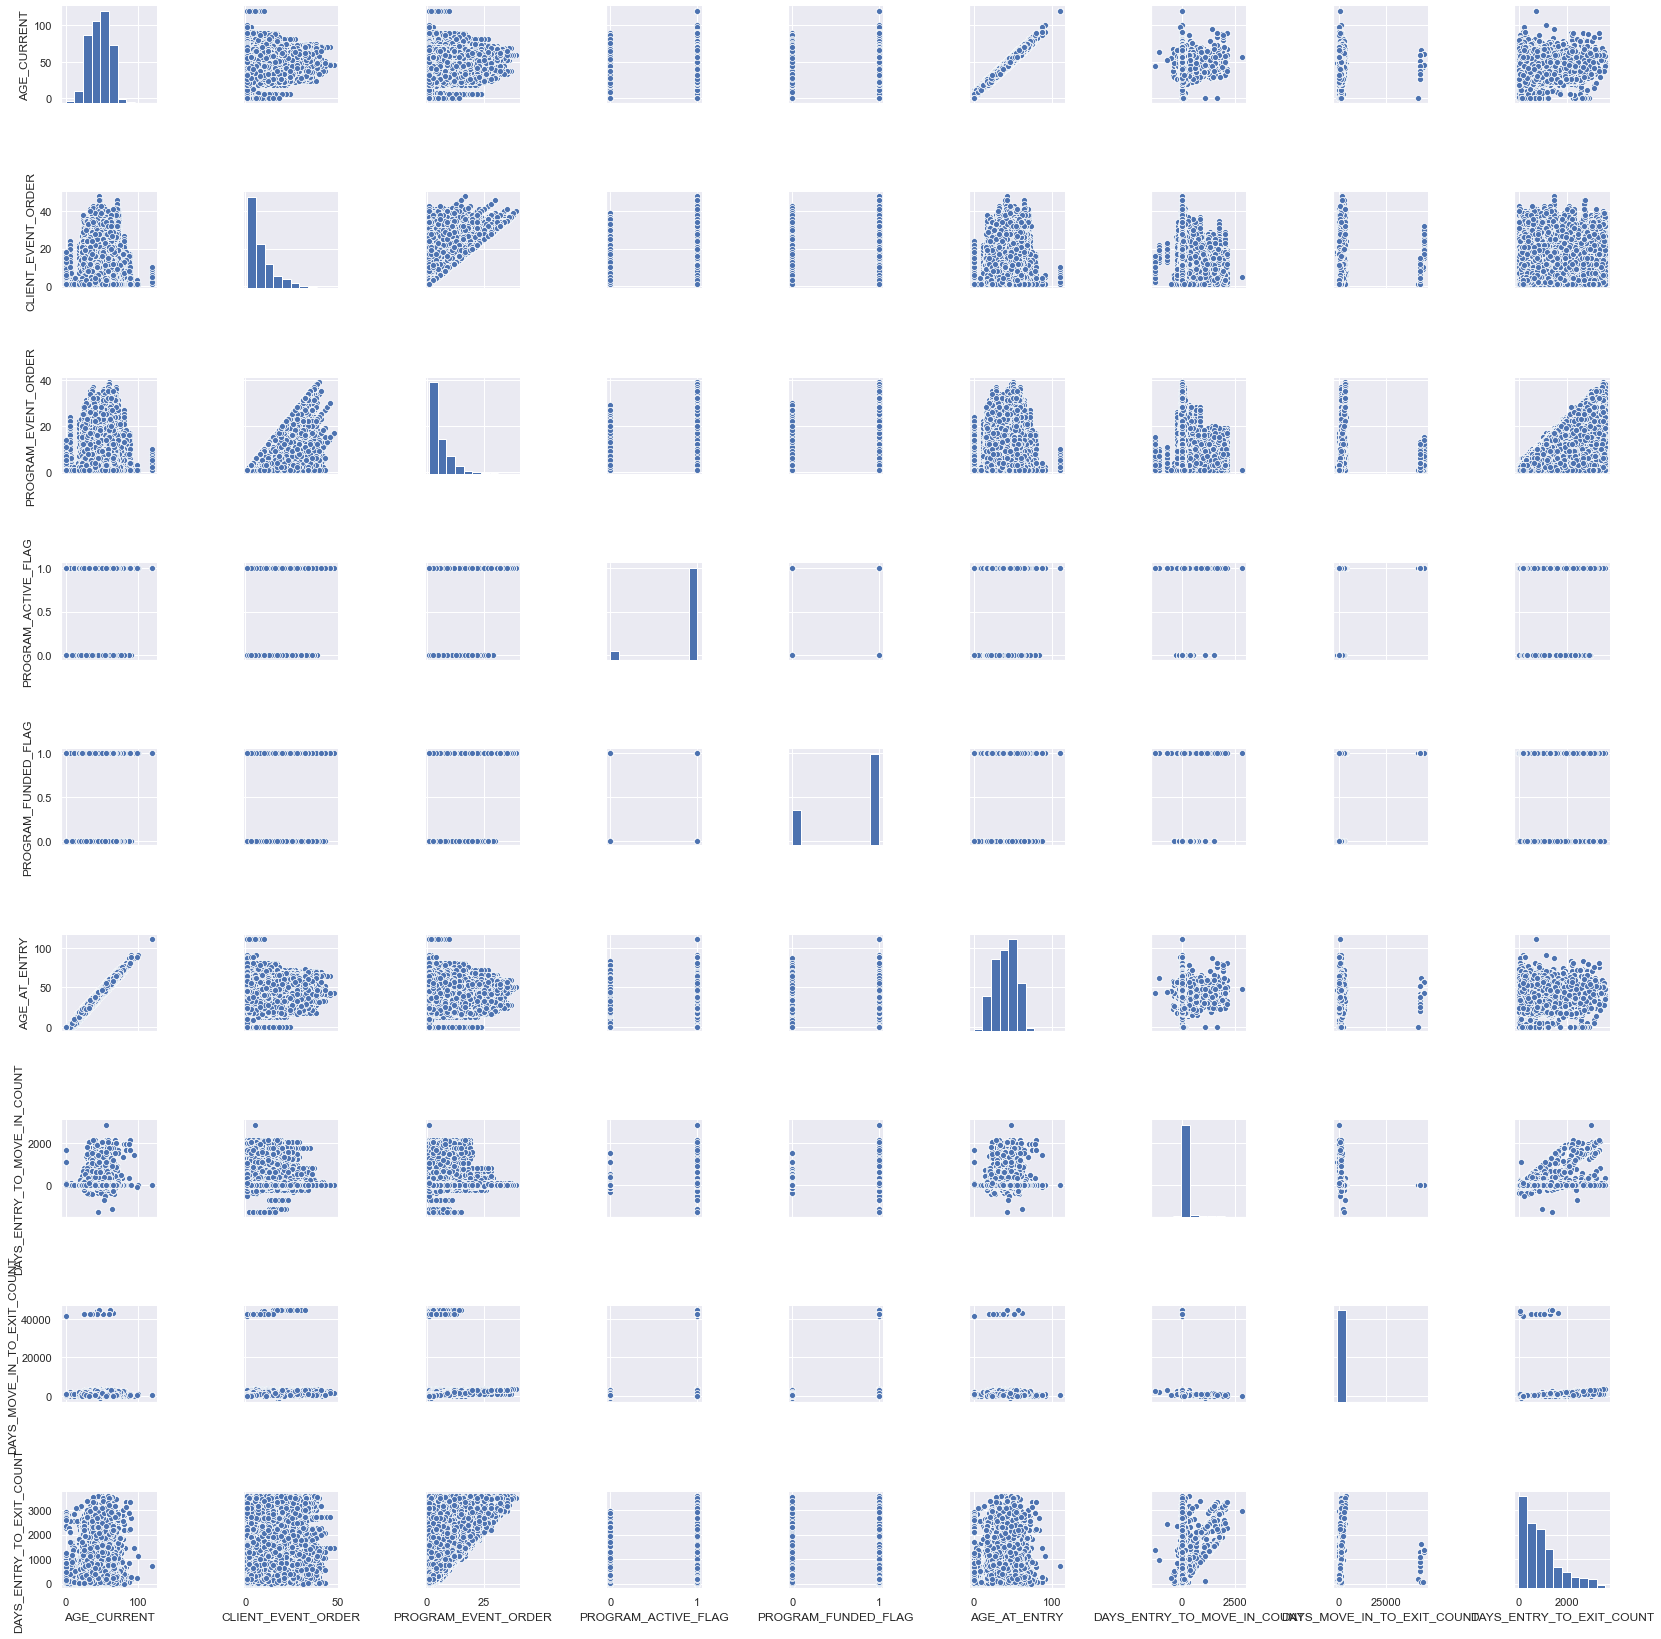

In [311]:
sns.pairplot(df5.drop('CLIENT_ID',axis=1));
# no obvious associated patterns

In [104]:
# looking closely at those who have left the program
# check grad status
#df5[df5['CLIENT_STATUS'] == 'exited_program']
# -> use graduation_type for target

**Predictive Analyses**

In [105]:
import scipy.stats as stat
import statsmodels.stats.multicomp as mc
from scipy.stats import chisquare

,GRADUATION_TYPE
graduated,0.525182
not recorded,0.261975
not graduated,0.212844


Text(0.5, 1.0, 'Percentage of Client Housing Graduation')

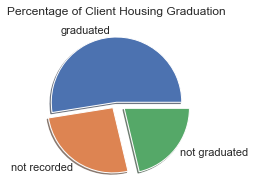

In [106]:
# plan to use grad type for y
grad = df5['GRADUATION_TYPE'].value_counts(normalize=True)
display(grad.to_frame())

#st, p = chisquare(grad)
#print('p value=' , p.round(2))

plt.figure(figsize=(4,3)) 
grad.plot(kind = 'pie', shadow=True, explode = (0, 0.1, 0.15));
plt.ylabel(None)
plt.title('Percentage of Client Housing Graduation')

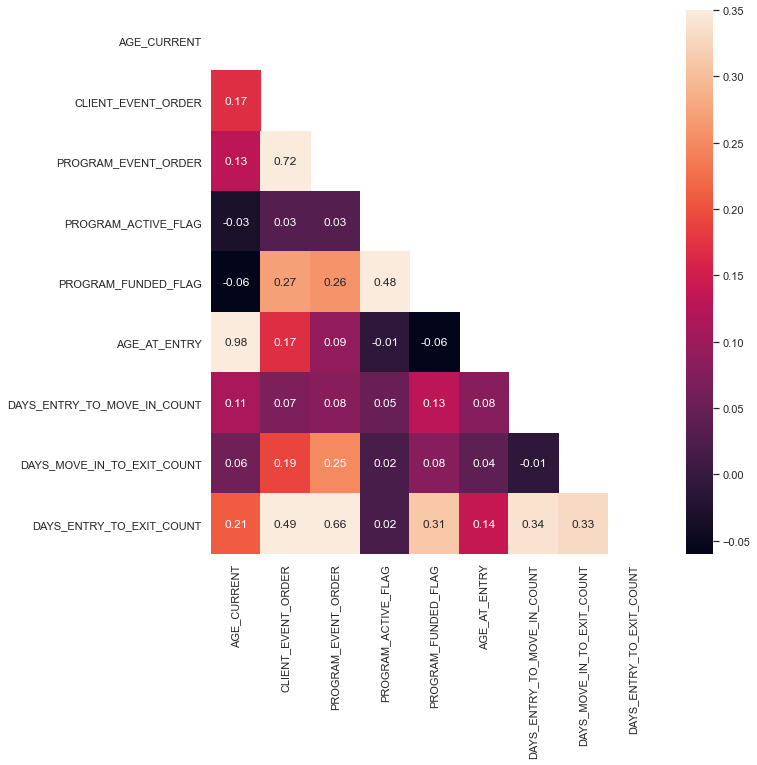

In [107]:
def corr_map(df, col):
    corr = df.corr().round(2)
    max_corr = 0.35
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style('white'):
        f, ax = plt.subplots(figsize = (10,10))
        ax = sns.heatmap(corr, vmax = max_corr, mask = mask,
                        annot=True)
        
corr_map(df5.drop('CLIENT_ID',axis=1), df5.columns)
# highly correlated continuous vars
#  drop program event order,
#  age_current,

**df6 = removing mod-highly correlated variables**

In [108]:
df6 = df5.copy()

In [109]:
df6.drop(['AGE_CURRENT',
         'PROGRAM_EVENT_ORDER',
         'CLIENT_EVENT_ORDER'],axis=1, inplace=True)

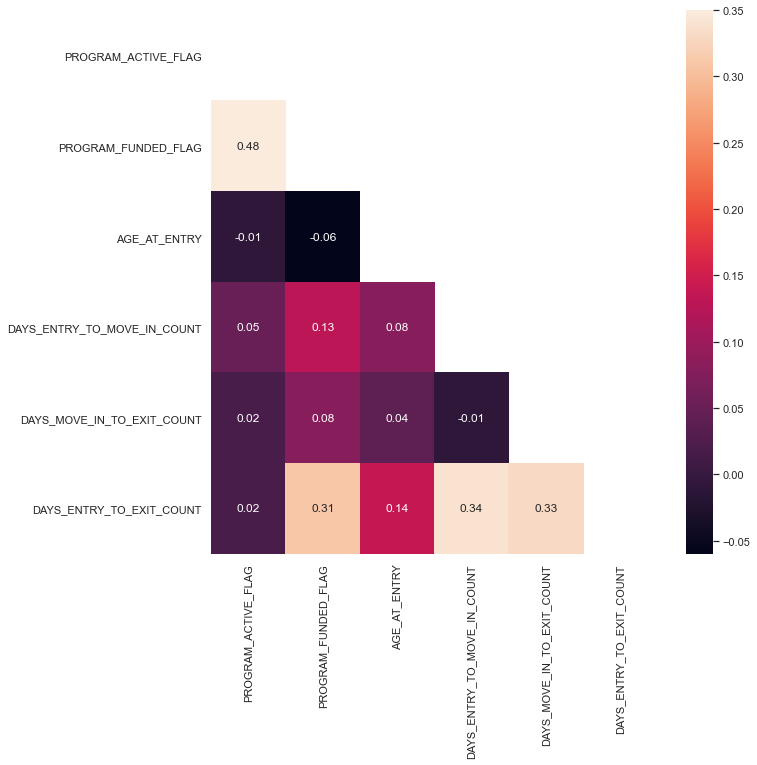

In [110]:
corr_map(df6.drop('CLIENT_ID',axis=1), df6.columns)

In [111]:
df6.drop('PROGRAM_FUNDED_FLAG',axis=1, inplace=True)

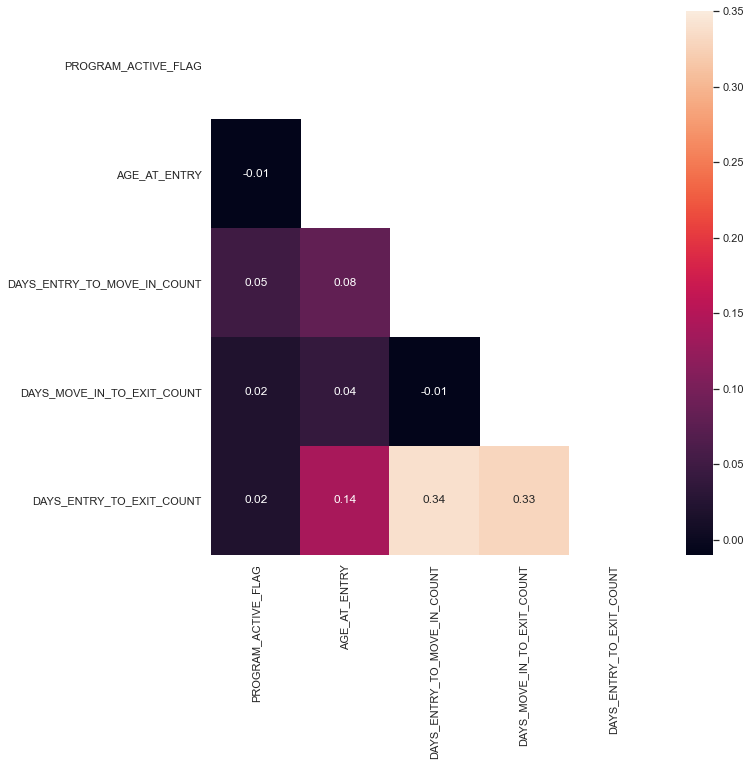

In [112]:
corr_map(df6.drop('CLIENT_ID',axis=1), df6.columns)

**Predictive Analysis for Graduation**

In [113]:
# drop unknown values, transform to binary 
df7 = df6.copy()

In [114]:
df7.shape

(81924, 29)

In [115]:
df7['GRADUATION_TYPE'].replace('not recorded' ,np.nan,inplace=True)
df7['GRADUATION_TYPE'].isnull().sum()

21462

In [116]:
# including only grad, non-grad
df7 = df7 [df7['GRADUATION_TYPE'].notna()]
df7.shape

(60462, 29)

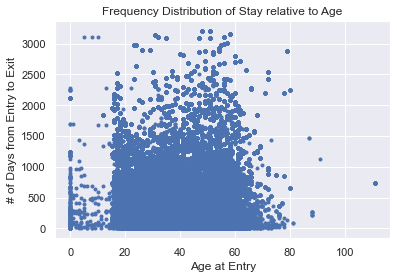

In [117]:
plt.plot(df7['AGE_AT_ENTRY'], df7['DAYS_ENTRY_TO_EXIT_COUNT'], '.')
plt.xlabel('Age at Entry')
plt.ylabel('# of Days from Entry to Exit')
plt.title('Frequency Distribution of Stay relative to Age');
# most stay from 0 - 1300 days
# majority are in ages 20-60

**What may predict graduation?**

In [118]:
df8 = df7.copy()

In [119]:
from sklearn.model_selection import train_test_split

import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedShuffleSplit

In [120]:
df8.drop([#'CLIENT_ID', include for now
          'CLIENTUID_CHF','PROGRAM_ACTIVE_FLAG',
               'ASSESSMENT_DATE','ASSESSMENT_DATE_DMY',
               'ASSESSMENT_DATE_MDY',
              'ENTRY_DATE','ENTRY_DATE_DMY','ENTRY_DATE_MDY',
               'MOVEIN_DATE','MOVEIN_DATE_DMY','MOVEIN_DATE_MDY',
               'CLIENT_STATUS','EXIT_DATE','EXIT_DATE_DMY',
              'EXIT_DATE_MDY', ],axis=1, inplace=True)

In [121]:
continuous = ['AGE_AT_ENTRY',
             'DAYS_ENTRY_TO_MOVE_IN_COUNT',
             'DAYS_MOVE_IN_TO_EXIT_COUNT',
             'DAYS_ENTRY_TO_EXIT_COUNT',
             ]
categorical = ['GENDER',
              'HOUSEHOLD_STATUS',
              'AGENCY_NAME',
              'PROGRAM_NAME', ## include for now
              'PROGRAM_TYPE',
              'HOUSING_TYPE',
             'ASSESSMENT_DESCRIPTOR',
              'ESTIMATED_HOUSING_STATUS',
              ]

In [122]:
continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])
cont_tr = continuous_pipeline.fit_transform(df8[continuous])

In [123]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop = 'first'))
])

cat_tr = categorical_pipeline.fit_transform(df8[categorical])

In [124]:
# null values  not included in pipeline, performed early
full_pipeline = ColumnTransformer([
    ('cont', continuous_pipeline, list(df8[continuous])),
    ('cat', categorical_pipeline, list(df8[categorical])),
])

In [125]:
df8['GRADUATION_TYPE'].replace({'graduated':1,
                               'not graduated': 0},inplace=True)

In [139]:
#df8['GRADUATION_TYPE'].value_counts()

In [128]:
train, test = train_test_split(df8, test_size=0.2, random_state=42)


In [129]:
X_train = full_pipeline.fit_transform(train.drop('GRADUATION_TYPE', 
                                         axis=1))
y_train = train[['GRADUATION_TYPE']].values

In [130]:
X_test = full_pipeline.transform(test.drop('GRADUATION_TYPE', axis =1))
y_test = test[['GRADUATION_TYPE']].values

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48369, 136)
(12093, 136)
(48369, 1)
(12093, 1)


In [132]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

**Random Forest Classifier**

In [133]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

<ipython-input-133-e88b3f1ef060>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [134]:
rf_clf_scores = cross_val_score(rf_clf,
                               X_train,
                               y_train,
                               scoring = 'roc_auc',
                               cv=5)

print('RFC CV score (ROC_AUC)(%):',(rf_clf_scores*100).mean().round(2))

/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

RFC CV score (ROC_AUC)(%): 97.96


In [135]:
y_train_pred = cross_val_predict(rf_clf, X_train, y_train,
                                cv=5,
                                method='predict')

confusion_matrix(y_train, y_train_pred)

/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

array([[12420,  1526],
       [ 1471, 32952]])

In [136]:
print('RFC Precision (%): ',(precision_score(y_train, y_train_pred)*100).round(2))

print('RFC Recall (%): ',(recall_score(y_train, y_train_pred)*100).round(2))

print('RFC F1 score (%): ',(f1_score(y_train, y_train_pred)*100).round(2))

RFC Precision (%):  95.57
RFC Recall (%):  95.73
RFC F1 score (%):  95.65


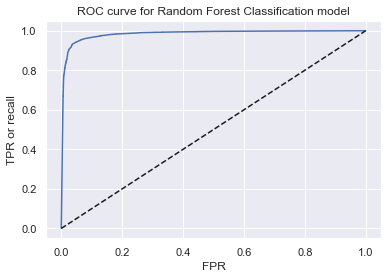

In [137]:
y_pred = rf_clf.predict(X_test) # already transformed in pipeline

y_proba = rf_clf.predict_proba(X_test)

# first column for class 0, 2nd for class 1 or positive
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR or recall')
plt.plot([0,1],[0,1], 'k--')
plt.grid(linestyle='-')
plt.title('ROC curve for Random Forest Classification model');